# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Import API key
from api_keys import api_key

from citipy import citipy

#params = {"key": api_key}




url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&params&APPID={api_key}"  

#response = requests.get(base_url, params=params).json()
#seattle_geo = response.json()

#response

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#types_df = pd.read_csv("output_data/cities.csv")
#types_df.head()

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [4]:
#cities convert list to panda series
#type(cities)
citys=pd.Series(cities)
long=pd.Series(lngs)
lat=pd.Series(lats)

#convert it to dataframe

city_df=pd.DataFrame({'city':citys,'Latitude':lat,'Longitude':long})

city_df["Temperature"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["WindSpeed"] = ""




In [5]:
city_df=city_df.head(500)
city_df.head()

,city,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,chapada dos guimaraes,-13.449997,-53.819583,,,,
1,new norfolk,-86.085420,126.332886,,,,
2,pevek,69.025763,170.078049,,,,
3,constitucion,13.700885,-123.621964,,,,
4,ayan,57.761537,138.538454,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:

for index, row in city_df.iterrows():
    # get city, lat, lng from df
    # change location each iteration 
    cit=row['city']
    lat= row["Latitude"]
    lon=row['Longitude']
    # Use the search term:
   
    params= f"lat={lat}&lon={lon}"

    # make request and print url
    response = requests.get(url, params=params).json()
    


    # convert to json
    response2 = json.dumps(response)
    # print(json.dumps(name_address, indent=4, sort_keys=True))
    #time.sleep(1)
    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        city_df.loc[index, "Temperature"] = response['main']['temp_max']
        city_df.loc[index, "Humidity"] =response['main']['humidity']
        city_df.loc[index, "Cloudiness"] = response['clouds']['all']
        city_df.loc[index, "WindSpeed"] =response['wind']['speed']
       
        print(f'{ cit}, City_number {index} found data updating table')
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")


chapada dos guimaraes, City_number 0 found data updating table
new norfolk, City_number 1 found data updating table
pevek, City_number 2 found data updating table
constitucion, City_number 3 found data updating table
ayan, City_number 4 found data updating table
esmeralda, City_number 5 found data updating table
ballina, City_number 6 found data updating table
beringovskiy, City_number 7 found data updating table
marawi, City_number 8 found data updating table
bolungarvik, City_number 9 found data updating table
bredasdorp, City_number 10 found data updating table
butaritari, City_number 11 found data updating table
itoman, City_number 12 found data updating table
san cristobal, City_number 13 found data updating table
rikitea, City_number 14 found data updating table
flinders, City_number 15 found data updating table
chagda, City_number 16 found data updating table
karratha, City_number 17 found data updating table
ancud, City_number 18 found data updating table
waipawa, City_number 1

iqaluit, City_number 158 found data updating table
tura, City_number 159 found data updating table
tuktoyaktuk, City_number 160 found data updating table
victoria, City_number 161 found data updating table
rungata, City_number 162 found data updating table
naze, City_number 163 found data updating table
khandyga, City_number 164 found data updating table
netishyn, City_number 165 found data updating table
havre-saint-pierre, City_number 166 found data updating table
barentsburg, City_number 167 found data updating table
perth, City_number 168 found data updating table
point fortin, City_number 169 found data updating table
provideniya, City_number 170 found data updating table
saint-philippe, City_number 171 found data updating table
codrington, City_number 172 found data updating table
snezhnogorsk, City_number 173 found data updating table
mys shmidta, City_number 174 found data updating table
esperance, City_number 175 found data updating table
port macquarie, City_number 176 found 

creel, City_number 313 found data updating table
vilhena, City_number 314 found data updating table
gurupa, City_number 315 found data updating table
kitsuki, City_number 316 found data updating table
moncton, City_number 317 found data updating table
kahului, City_number 318 found data updating table
talcahuano, City_number 319 found data updating table
kenai, City_number 320 found data updating table
geraldton, City_number 321 found data updating table
teguise, City_number 322 found data updating table
zhanaozen, City_number 323 found data updating table
nanortalik, City_number 324 found data updating table
dunedin, City_number 325 found data updating table
east london, City_number 326 found data updating table
makakilo city, City_number 327 found data updating table
mouila, City_number 328 found data updating table
conceicao do araguaia, City_number 329 found data updating table
nizhniy tsasuchey, City_number 330 found data updating table
jishou, City_number 331 found data updating 

xuddur, City_number 471 found data updating table
lavrentiya, City_number 472 found data updating table
bristol, City_number 473 found data updating table
georgetown, City_number 474 found data updating table
ustka, City_number 475 found data updating table
nizwa, City_number 476 found data updating table
tupik, City_number 477 found data updating table
tarko-sale, City_number 478 found data updating table
bilma, City_number 479 found data updating table
kardymovo, City_number 480 found data updating table
meulaboh, City_number 481 found data updating table
warqla, City_number 482 found data updating table
ketchenery, City_number 483 found data updating table
palm coast, City_number 484 found data updating table
kainantu, City_number 485 found data updating table
baffa, City_number 486 found data updating table
half moon bay, City_number 487 found data updating table
porto novo, City_number 488 found data updating table
parkes, City_number 489 found data updating table
zheleznodorozhny

In [7]:
#city_df.head()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
 city_df.head()

city_df.to_csv("City_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

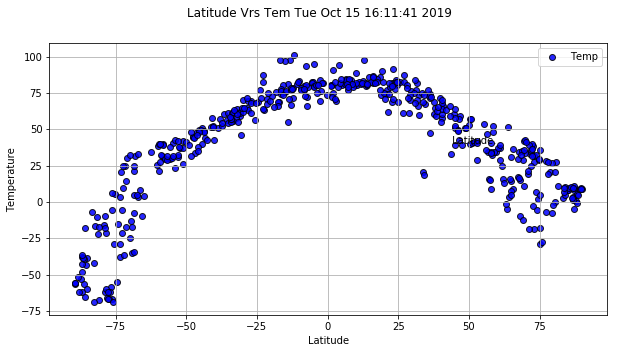

In [9]:
plt.figure(figsize = (10, 5))
plt.suptitle(f'Latitude Vrs Tem {time.ctime()}')
plt.scatter(city_df['Latitude'],city_df['Temperature'],alpha=0.85,c='blue',edgecolor = 'black', label = 'Temp')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.text(43,40," Latitude.")
plt.legend()
plt.grid()

plt.savefig('Temp.jpeg')
plt.show()

#### Latitude vs. Humidity Plot

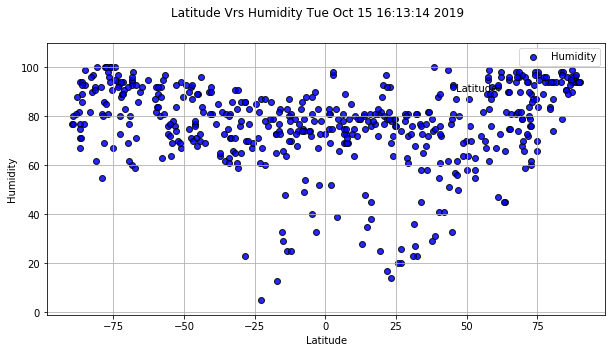

In [10]:
plt.figure(figsize = (10, 5))
plt.suptitle(f'Latitude Vrs Humidity {time.ctime()}')
plt.scatter(city_df['Latitude'],city_df['Humidity'],alpha=0.85,c='blue',edgecolor = 'black', label = 'Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.text(45,90," Latitude.")
plt.ylim(-1,110)
plt.legend()
plt.grid()

plt.savefig("Humidity.jpeg")
plt.show()

#### Latitude vs. Cloudiness Plot

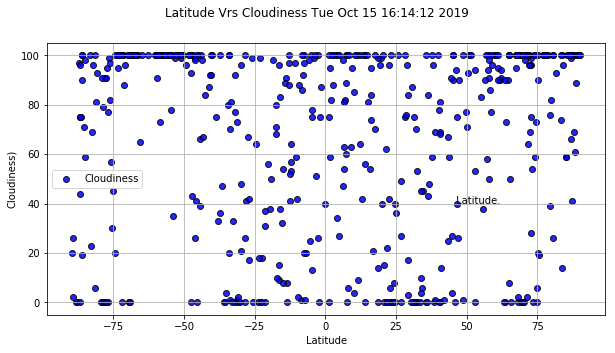

In [12]:
plt.figure(figsize = (10, 5))
plt.suptitle(f'Latitude Vrs Cloudiness {time.ctime()}')
plt.scatter(city_df['Latitude'],city_df['Cloudiness'],alpha=0.85,c='blue',edgecolor = 'black', label = 'Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness)')
plt.text(45,40," Latitude.")
plt.legend()
plt.grid()
plt.savefig('Cloudiness.jpeg')
plt.show()

#### Latitude vs. Wind Speed Plot

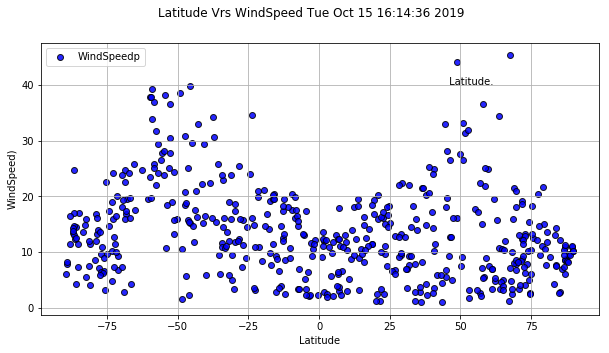

In [13]:
plt.figure(figsize = (10, 5))
plt.suptitle(f'Latitude Vrs WindSpeed {time.ctime()}')
plt.scatter(city_df['Latitude'],city_df['WindSpeed'],alpha=0.85,c='blue',edgecolor = 'black', label = 'WindSpeedp')
plt.xlabel('Latitude')
plt.ylabel('WindSpeed)')
plt.text(45,40," Latitude.")
plt.legend()
plt.grid()


plt.savefig('WindSpeed.jpeg')
plt.show()